In [15]:
from preamble import *
import mglearn

#0 - No diseases, 1 Disease
df = pd.read_csv('./datasets/heart.csv')
print(df.shape)
df.head()
print("\n")
df.info()
print("\n")
df.describe()

(1025, 14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB




,age,sex,cp,trestbps,...,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,...,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,...,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,...,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,...,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,...,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,...,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,...,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,...,2.00,4.00,3.00,1.00


In [16]:
#Comprobar NAs
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
df.drop_duplicates(inplace=True)
print("Duplicados exactos:", df.duplicated().sum())

Duplicados exactos: 0


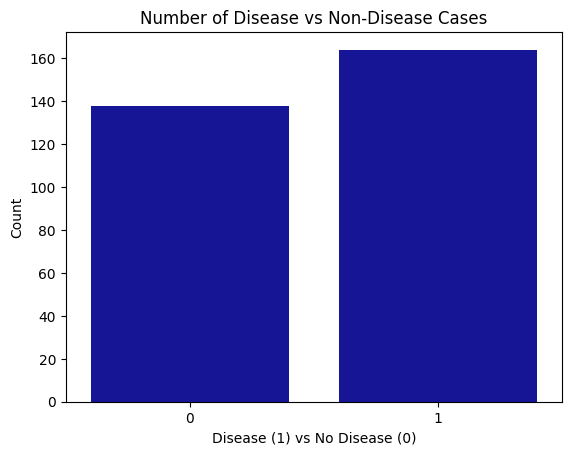

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.xlabel('Disease (1) vs No Disease (0)')
plt.ylabel('Count')
plt.title('Number of Disease vs Non-Disease Cases')
plt.show()

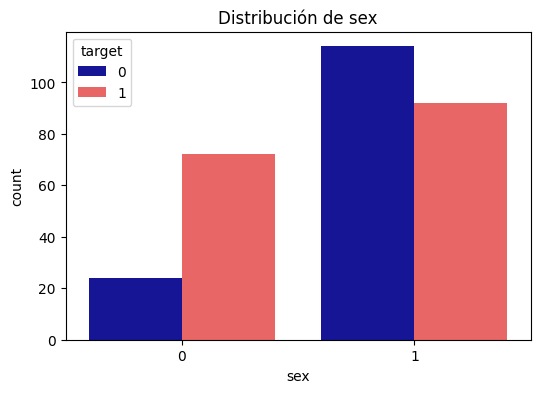

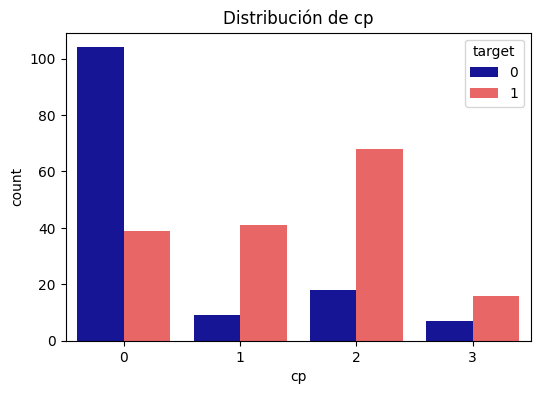

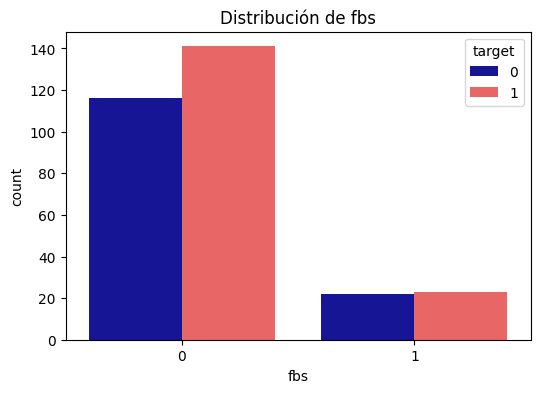

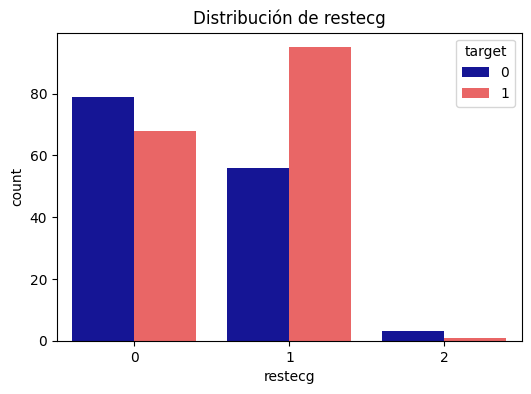

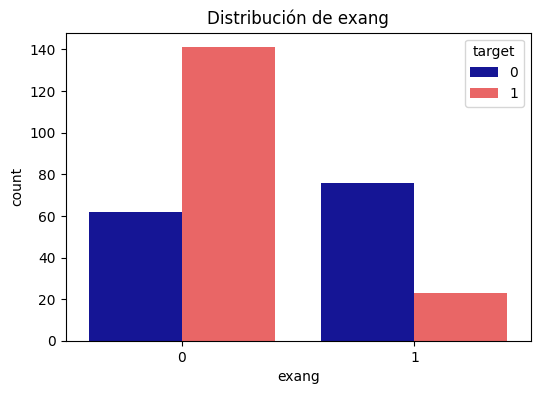

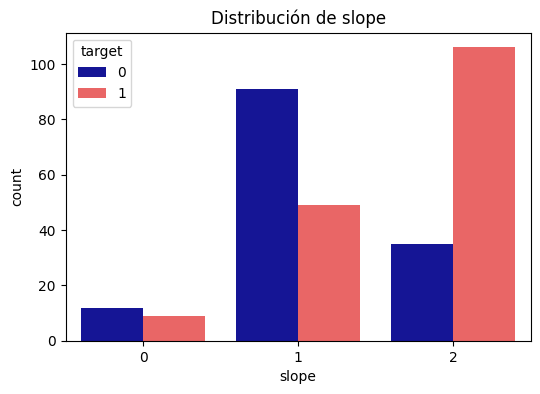

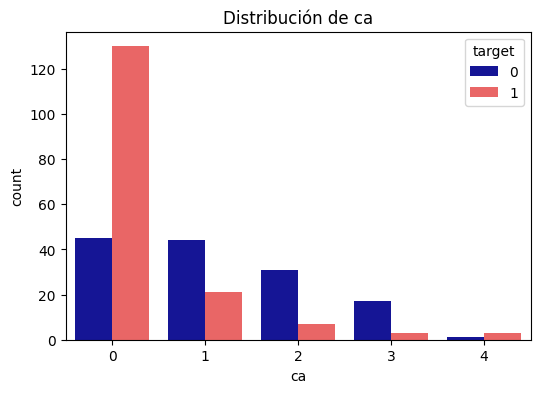

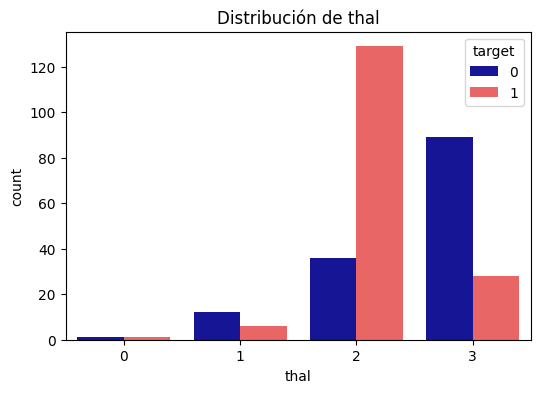

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Listas de columnas
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
num_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# ---------- CATEGÓRICAS ----------
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='target')  # hue='num' para ver sano/enfermo
    plt.title(f"Distribución de {col}")
    plt.show()


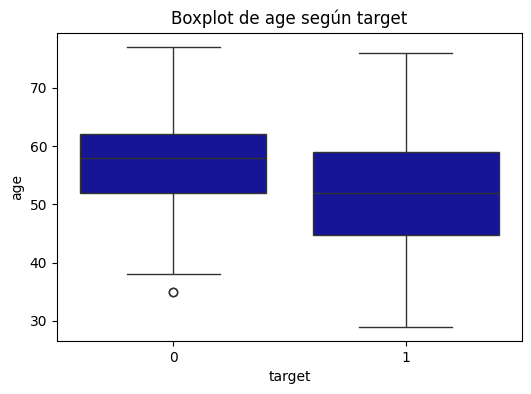

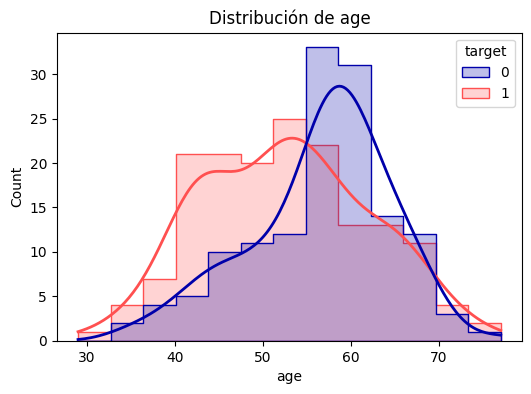

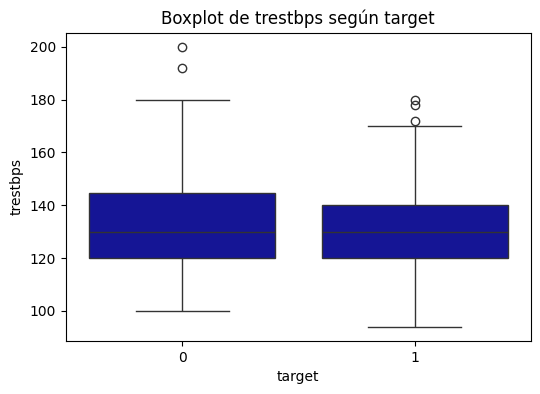

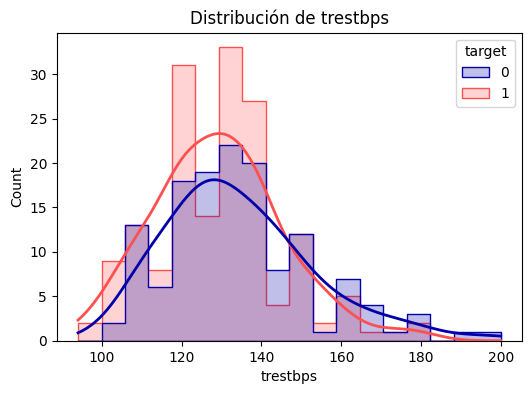

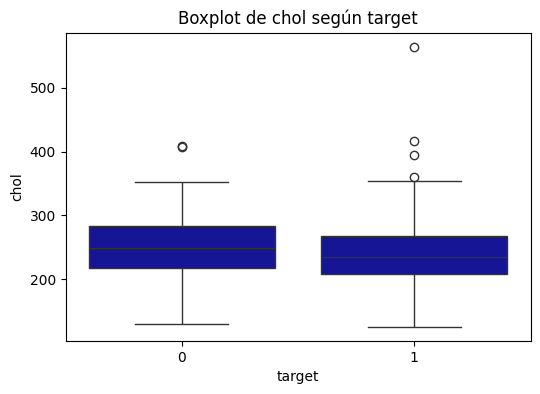

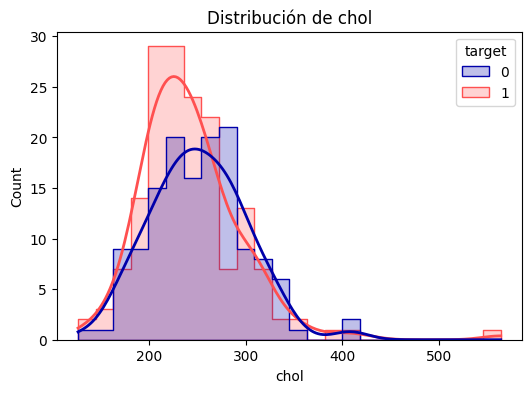

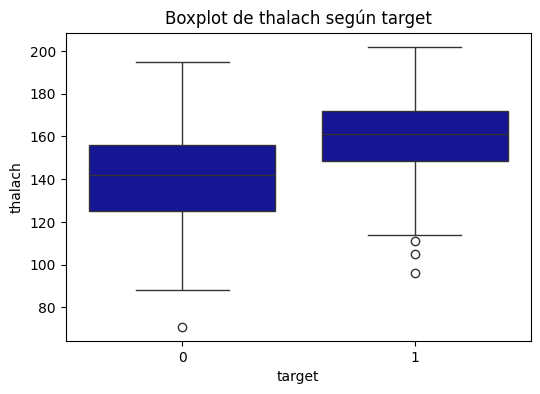

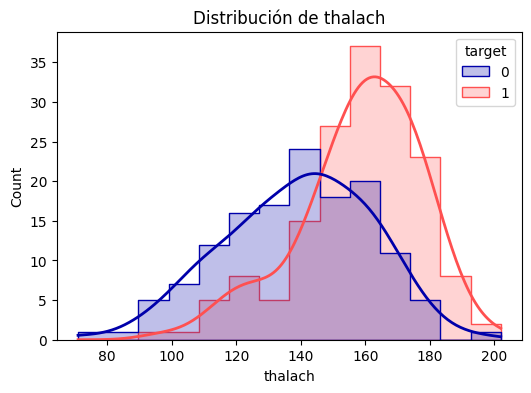

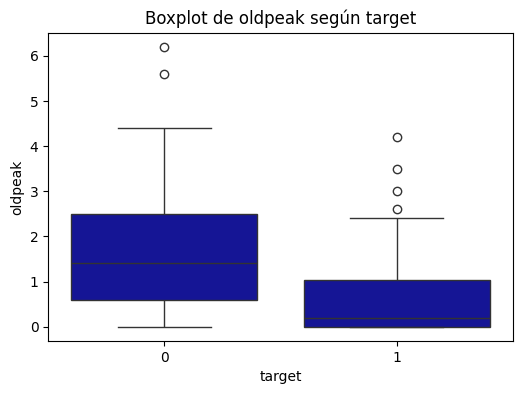

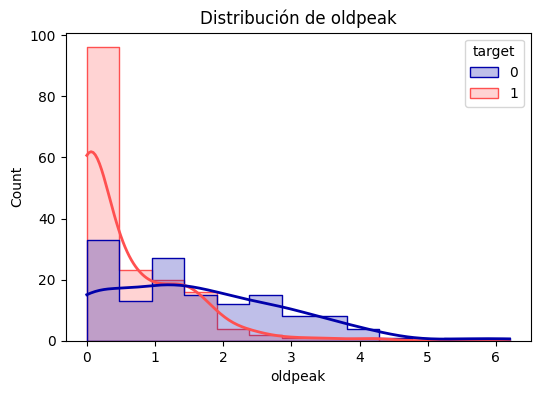

In [27]:
# ---------- NUMÉRICAS ----------
for col in num_cols:
    # Boxplot para ver outliers y diferencias por target
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='target', y=col)
    plt.title(f"Boxplot de {col} según target")
    plt.show()
    
    # Histplot para ver distribución general
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, kde=True, hue='target', element="step")
    plt.title(f"Distribución de {col}")
    plt.show()

## Análisis univariado

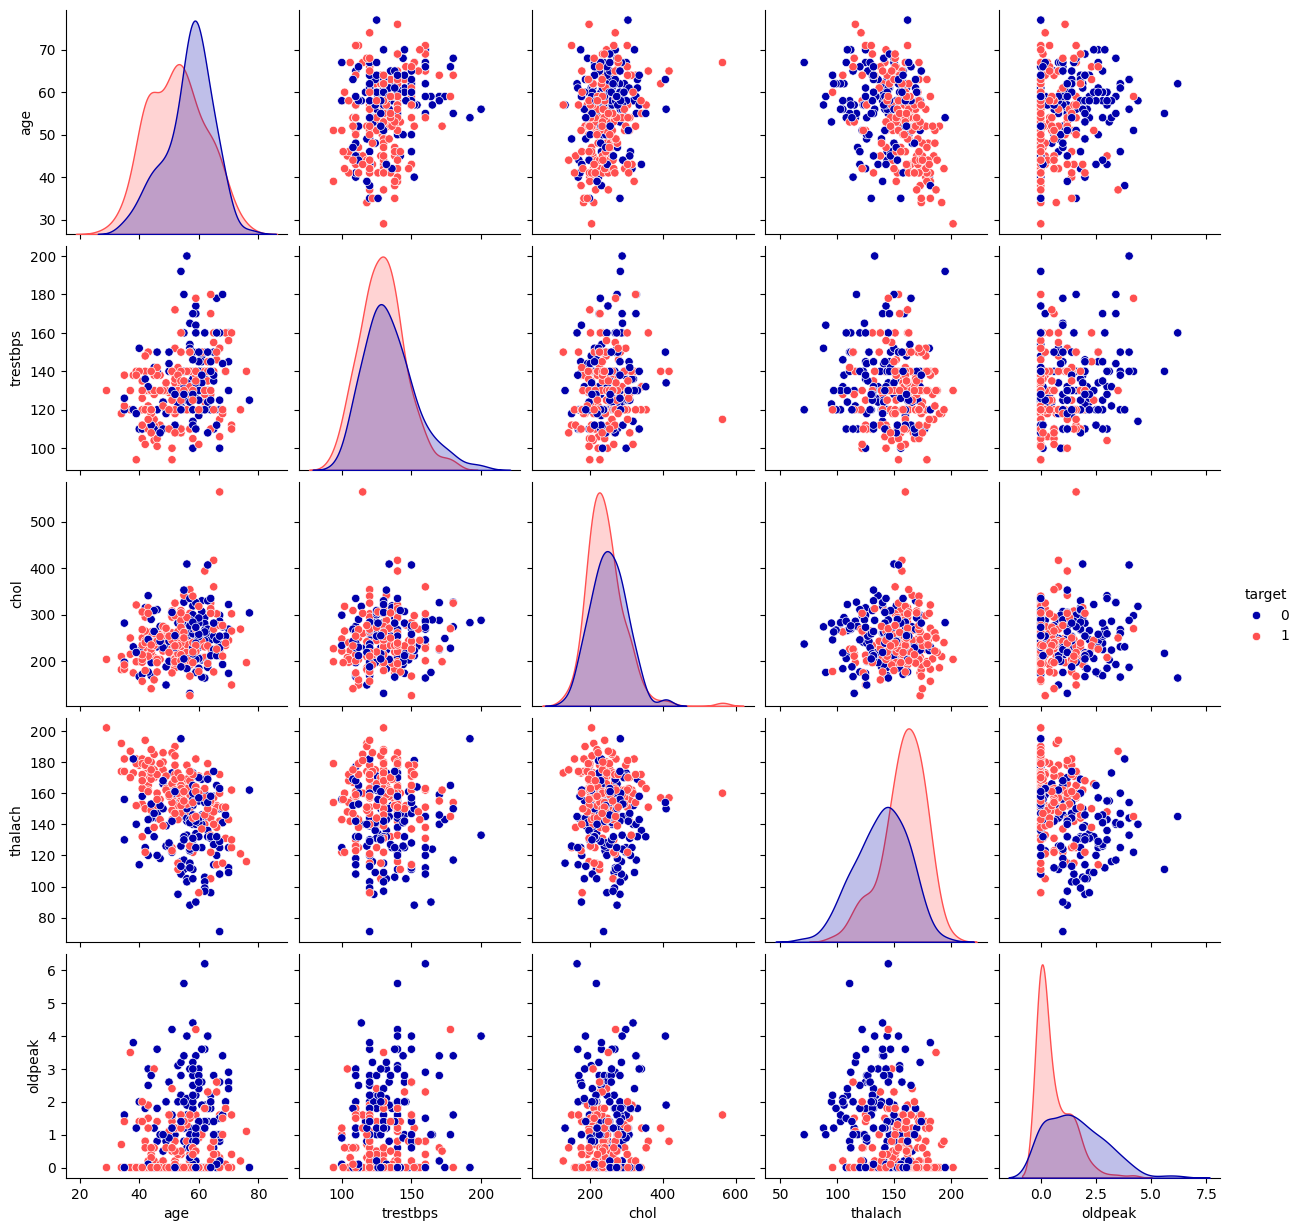

In [28]:
sns.pairplot(df, vars=['age','trestbps','chol','thalach','oldpeak'], hue='target')
plt.show()


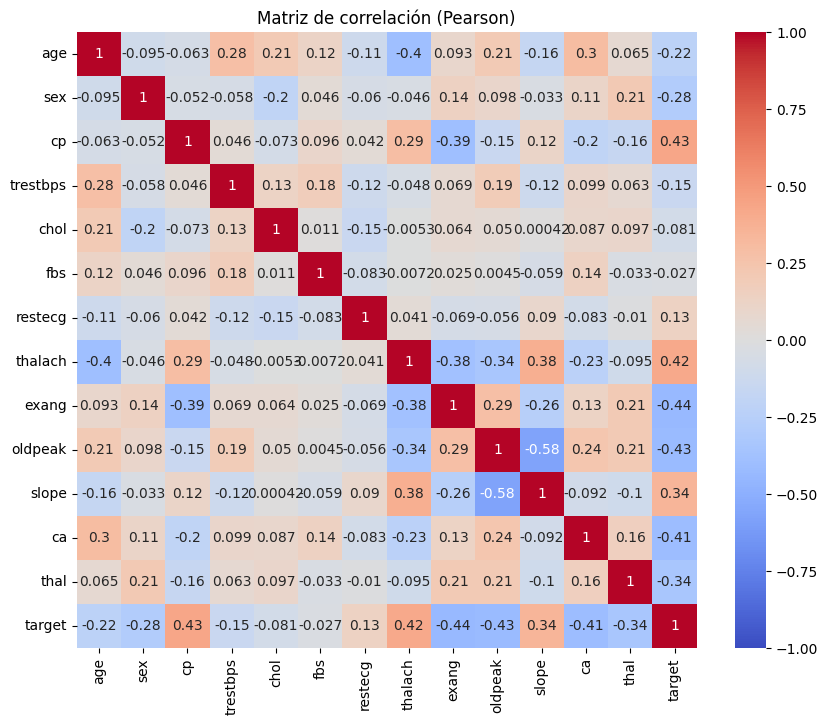

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular correlación (Pearson por defecto)
corr = df.corr(numeric_only=True)  # numeric_only evita problemas con categóricas

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title("Matriz de correlación (Pearson)")
plt.show()


exang      -0.44
cp          0.43
oldpeak    -0.43
thalach     0.42
ca         -0.41
slope       0.34
thal       -0.34
sex        -0.28
age        -0.22
trestbps   -0.15
restecg     0.13
chol       -0.08
fbs        -0.03
Name: target, dtype: float64


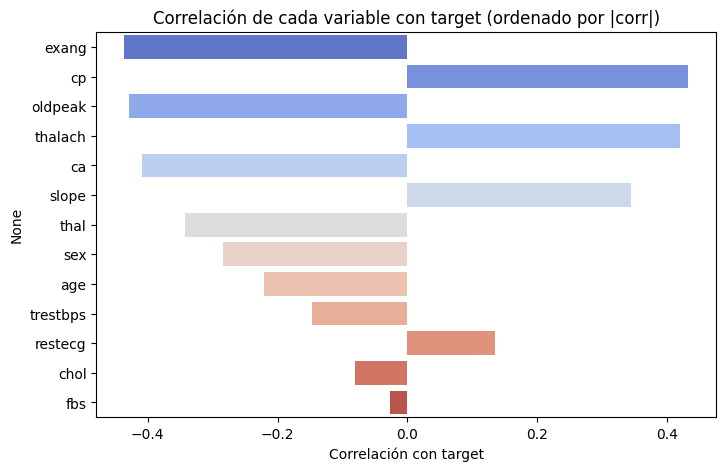

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular correlaciones
corr = df.corr(numeric_only=True)

# Seleccionar correlación con target
corr_target = corr['target'].drop('target')

# Ordenar por valor absoluto
corr_target_sorted = corr_target.reindex(corr_target.abs().sort_values(ascending=False).index)

# Mostrar como tabla
print(corr_target_sorted)

# Barplot
plt.figure(figsize=(8,5))
sns.barplot(
    x=corr_target_sorted.values,
    y=corr_target_sorted.index,
    hue=corr_target_sorted.index,   # usamos la misma variable como hue
    dodge=False,                    # evita duplicados
    legend=False,                   # ocultamos la leyenda redundante
    palette="coolwarm"
)
plt.title("Correlación de cada variable con target (ordenado por |corr|)")
plt.xlabel("Correlación con target")
plt.show()



Accuracy: 0.8032786885245902

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61


Confusion matrix:
 [[21  7]
 [ 5 28]]

ROC AUC: 0.8668831168831168


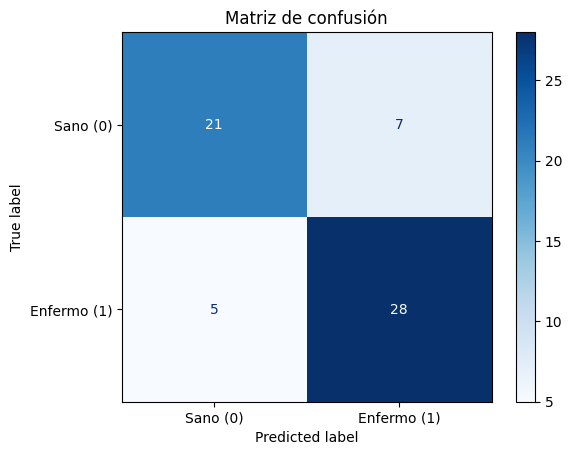

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
# === 1) Preparar datos ===
X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# === 2) Pipeline mínimo (solo modelo) ===
pipe_basic = Pipeline(steps=[
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42))
])

# === 3) Entrenar ===
pipe_basic.fit(X_train, y_train)

# === 4) Evaluar ===
y_pred = pipe_basic.predict(X_test)
y_pred_proba = pipe_basic.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC AUC:", roc_auc_score(y_test, y_pred_proba))

# Calcular matriz de confusión
cm_display = ConfusionMatrixDisplay.from_estimator(
    pipe_basic, X_test, y_test,
    display_labels=["Sano (0)", "Enfermo (1)"],
    cmap="Blues"
)

plt.title("Matriz de confusión")
plt.show()
